# OpenPose PyTorch

In [ ]:
!git clone https://github.com/Hzzone/pytorch-openpose
%cd pytorch-openpose

Cloning into 'pytorch-openpose'...
remote: Enumerating objects: 154, done.
remote: Total 154 (delta 0), reused 0 (delta 0), pack-reused 154
Receiving objects: 100% (154/154), 20.18 MiB | 25.67 MiB/s, done.
Resolving deltas: 100% (68/68), done.
/content/pytorch-openpose


In [ ]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np
import os

from src import model
from src import util
from src.body import Body
from src.hand import Hand

import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master'
os.chdir(path)

In [ ]:
body_estimation = Body('model/body_pose_model.pth') #body detect용 pre_trained model 불러오기

In [ ]:
#모든 인플루언서의 사진 게시물에 pose estimation 적용하여 저장하기

before_path = '/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/인플루언서'
influencer_list = os.listdir(before_path)

canvas_list = []


for influencer in influencer_list:
  folder_path = before_path+'/'+influencer+'/images/'
  image_list = os.listdir(folder_path)
  for image in image_list:
    image_file = folder_path+image

    # enable GPU for acceleration
    oriImg = cv2.imread(image_file)
    candidate, subset = body_estimation(oriImg)
    #canvas = copy.deepcopy(oriImg) 
    back = np.ones(oriImg.shape) #흰색배경
    #canvas = util.draw_bodypose(canvas, candidate, subset)
    canvas = util.draw_bodypose(back, candidate, subset) 
    #각 사진들의 pose를 비교해야 하므로 
    #->원본 사진에 pose가 그려져 나오는 대신 흰색 배경에 pose가 그려져 나오게 설정

    #candidates.append(candidate)
    #subsets.append(subset)
    #canvas_list.append(canvas[:, :, [2, 1, 0]]) #이미지 대신 텐서형으로 pose 비교할 경우 사용?

    plt.figure(figsize=(10,10))
    plt.imshow(canvas[:, :, [2, 1, 0]])
    plt.axis('off')

    img_folder = '/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/'+influencer
    if not os.path.isdir(img_folder):
      os.mkdir(img_folder)

    save_path = img_folder+'/'+image
    plt.savefig(save_path) #이미지 저장
    plt.show()


  print('complete',influencer)


# 클러스터링
포즈 이미지를 이용해서 유사한 포즈 군집화

In [ ]:
#이미지 유사도 계산을 통해 나온 비슷한 #mood의 인플루언서 계정 top3만 사용
#해당 3개 계정의 사진들 새로운 하나의 폴더로 복사

In [ ]:
#원본 사진
from distutils.dir_util import copy_tree

source1 = "/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/인플루언서/@337janggoon"
source2 = "/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/인플루언서/@_zia_mood"
source3 = "/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/인플루언서/@mini.d31"
destination = "/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/인플루언서/insta_pose"

if not os.path.isdir(destination):
      os.mkdir(destination)

copy_tree(source1, destination) #source1 폴더의 항목을 destination 폴더로 복사
copy_tree(source2, destination)
copy_tree(source2, destination)

In [ ]:
#포즈 사진
source1 = "/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/@337janggoon"
source2 = "/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/@_zia_mood"
source3 = "/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/@mini.d31"
destination = "/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose"

if not os.path.isdir(destination):
      os.mkdir(destination)

copy_tree(source1, destination) 
copy_tree(source2, destination)
copy_tree(source2, destination)

In [ ]:
len(os.listdir('/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose'))

58

In [ ]:
# 라이브러리 호출
import os
import numpy as np
from PIL import Image

# 이미지 리사이징 하기
targerdir = r"/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose"  # 해당 폴더 설정

files = os.listdir(targerdir)

format = [".jpg", ".png", ".jpeg", "bmp", ".JPG", ".PNG", "JPEG", "BMP"]  # 지원하는 파일 형태의 확장자들
for (path, dirs, files) in os.walk(targerdir):
    for file in files:
        if file.endswith(tuple(format)):
            image = Image.open(path + '/' + file)
            print(image.filename)
            print(image.size)

            if image.mode != 'RGB':
                image = image.convert('RGB')
                print("RGB 모드가 아닌 이미지를 변환!")

            image = image.resize((100,100))
            
            image_folder = "/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose/100/"
            if not os.path.isdir(image_folder):
              os.mkdir(image_folder)

            image.save(image_folder + file)


# 변환할 이미지 목록 불러오기
image_path = '/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose/100/'

img_list = os.listdir(image_path)  # 디렉토리 내 모든 파일 불러오기
img_list_jpg = [img for img in img_list if img.endswith(".jpg")]  # 지정된 확장자만 필터링

img_list_np = []

for i in img_list_jpg:
    img = Image.open(image_path + i)
    img_array = np.array(img)
    img_list_np.append(img_array)

img_np = np.array(img_list_np)  # 리스트를 numpy로 변환
np.save('/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose', img_np)  # x_save.npy
print(img_np.shape)
print("결과: 정상적 으로 저장 완료")

/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose/2999164451154283007.jpg
(720, 720)
/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose/2997715096077387447.jpg
(720, 720)
/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose/2996265464122393859.jpg
(720, 720)
/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose/2994092595384554643.jpg
(720, 720)
/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose/2992647115437306936.jpg
(720, 720)
/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose/2991191859973319435.jpg
(720, 720)
/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose/2989017741459213530.jpg
(720, 720)
/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_

In [ ]:
import numpy as np

sample_data = np.load('/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose.npy')
sample_data_2d = sample_data.reshape(-1, 100 * 100 * 3)

from sklearn.cluster import KMeans

km = KMeans(n_clusters=10) #k=10인 k-means clustering
km.fit(sample_data_2d)

print("km.labels_", km.labels_)
print("km.labels_.shape", km.labels_.shape)

print(np.unique(km.labels_, return_counts=True))

km.labels_ [0 8 5 0 2 2 2 2 0 4 3 0 0 8 0 8 2 5 0 3 2 8 2 5 0 2 2 8 3 4 4 6 9 7 1 6 7
 9 7 7 6 6 7 6 6 1 7 4 1 9 1 6 6 9 6 6 7 1]
km.labels_.shape (58,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 8,  5,  9,  3,  4,  3, 10,  7,  5,  4]))


In [ ]:
targerdir = r"/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/pose_complete/insta_pose"  # 해당 폴더 설정

files = os.listdir(targerdir)

In [ ]:
element_num = []
for i in range(10):
  element_num.append(sum(km.labels_ == i)) #element_num : 각 클러스터의 element 수

In [ ]:
element_num

[8, 5, 9, 3, 4, 3, 10, 7, 5, 4]

In [ ]:
#상위 세 클러스터의 인덱스 추출
top1_idx = np.argmax(element_num)
element_num[top1_idx]=0
top2_idx = np.argmax(element_num)
element_num[top2_idx]=0
top3_idx = np.argmax(element_num)

top1_array = km.labels_ == top1_idx
top2_array = km.labels_ == top2_idx
top3_array = km.labels_ == top3_idx

In [ ]:
#각 클러스터의 첫번째 포즈를 추천 포즈로 선택
pose1 = pd.DataFrame(files[:-1])[top1_array].iloc[0,0]
pose2 = pd.DataFrame(files[:-1])[top2_array].iloc[0,0]
pose3 = pd.DataFrame(files[:-1])[top3_array].iloc[0,0]

In [ ]:
original_image = '/content/drive/MyDrive/KUIAI-해커톤/openpose/pytorch-openpose-master/인플루언서/insta_pose/images/'

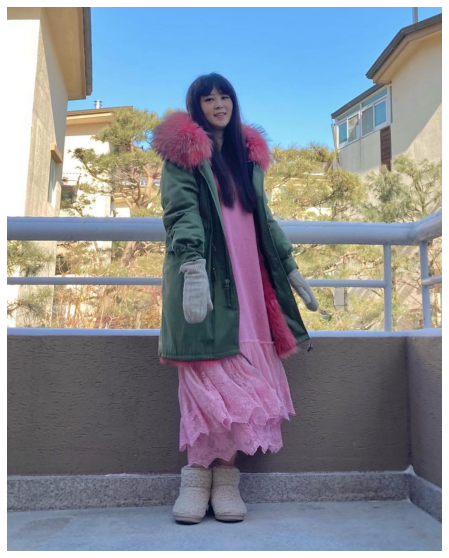

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread(original_image+pose1)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

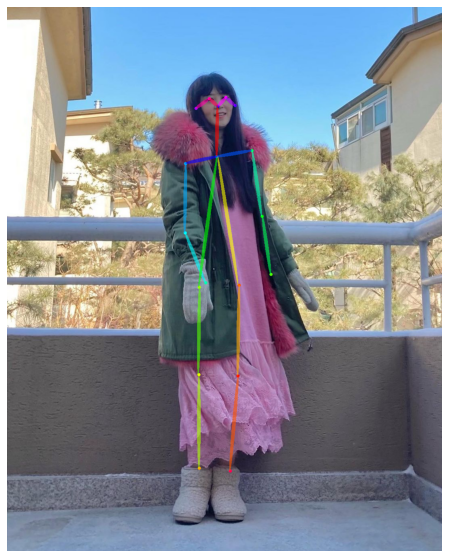

In [93]:
# enable GPU for acceleration
#detect body
#keypoints index : index = int(subset[n][i])
#keypoints corrd : x,y = candidate[index][0:2]

oriImg = cv2.imread(original_image+pose1)
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)

plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

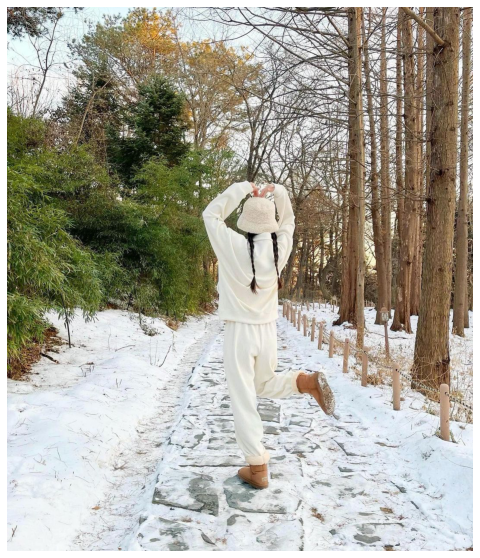

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread(original_image+pose2)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

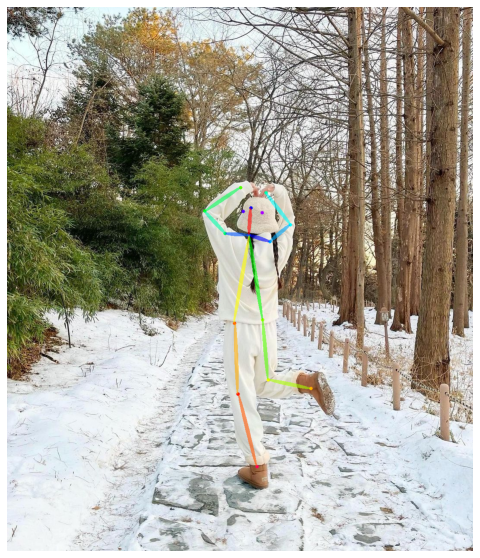

In [94]:
# enable GPU for acceleration
oriImg = cv2.imread(original_image+pose2)
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)

plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

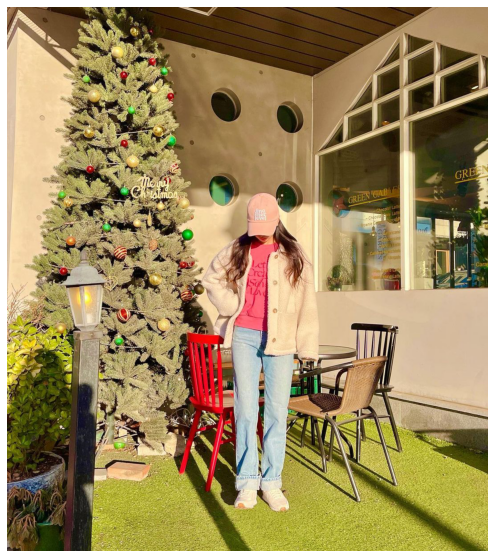

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread(original_image+pose3)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

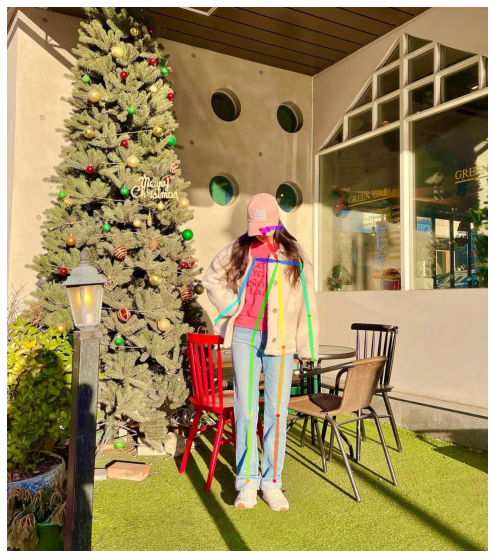

In [95]:
# enable GPU for acceleration
oriImg = cv2.imread(original_image+pose3)
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)

plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()